In [1]:
%pylab inline
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams.update({'font.size':18})

In [3]:
x,y,f = np.loadtxt("array_18x18.xyz",usecols=(1,2,4),skiprows=2,unpack=True)

In [4]:
r = 1.1
Dic = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic[n] = vecinos

In [5]:
H = np.zeros((natoms,natoms), dtype = 'complex')

In [6]:
Hop = {}
a = exp(-1j*pi)
γ = 1
λ = 4.5
for n in Dic.keys():
    vecinos = Dic[n]
    hop = []
    for v in vecinos:
        f0 = f[n]
        f1 = f[v]
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        H[n,v] = fase
        H[v,n] = fase
        hop.append(fase)
    Hop[n] = hop

f0 = 0
f1 = 0
fase = 1
for n in Dic.keys():
    vecinos = Dic[n]
    c = 0
    for v in vecinos:
        posx     = x[n]
        posy     = y[n]
        f0       = f[n]
        f1       = f[v] 
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        
        if ( posx%2==0 and posy%2==0  ):
            if ( x[v] > x[n] ):
                H[(n,v)] = a*fase
                H[(v,n)] = a*fase
        elif(posx%2==1 and posy%2==1):
            if ( x[v] > x[n] ):
                H[(n,v)] = a*fase
                H[(v,n)] = a*fase
        else:
            pass

In [7]:
Hop = {}
for i in Dic.keys():
    Hop[i] = [H[i][j] for j in range(len(H[i])) if H[i][j]!= 0]
    

In [8]:
Hop = {}
for i in Dic.keys():
    Hop[i] = [H[i][j] for j in range(len(H[i])) if H[i][j]!= 0]

In [9]:
Hop[1]

[(-1-1.2246467991473532e-16j), (4.5+0j), (1+0j)]

In [10]:
np.savetxt('halmitonian.txt',H)

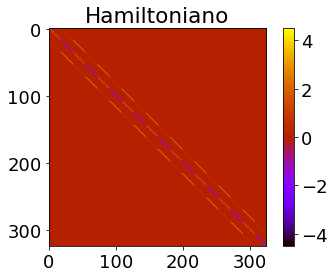

In [11]:
fig, ax = plt.subplots()
cx = ax.imshow(H.real, cmap = 'gnuplot')
ax.set_title('Hamiltoniano')
fig.colorbar(cx)
fig.savefig('hamiltonian_sin_6x6.pdf')

In [12]:
%%time
Ek, U = eigh(H)
Ek = np.real(Ek)
#U = np.real(U)

CPU times: user 37.5 ms, sys: 3.81 ms, total: 41.3 ms
Wall time: 21.2 ms


In [13]:
np.savetxt("Energias.txt",Ek,fmt = '%s', comments = '')
np.savetxt("Estados.txt",U,fmt = '%s', comments = '')

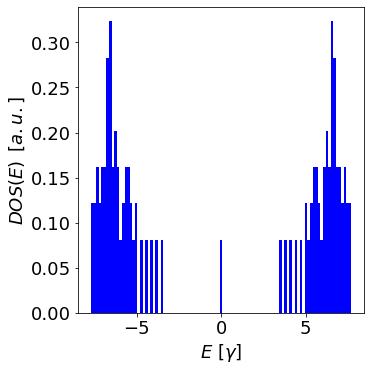

In [14]:
fig, ax = plt.subplots(figsize = (5.5,5.5))
ax.hist(np.real(Ek),101, density = 1, color = 'b')
ax.set_ylabel('$DOS(E) \,\,\,[a.u.]$')
ax.set_xlabel('$E\,\,[\gamma]$')
fig.tight_layout()
#ax.set_title('Density of States')
fig.savefig('Dos_6x6.pdf')

In [15]:
indexsort = argsort(Ek)
Est = [i for i,val in enumerate(Ek) if abs(val) < 0.2]
ek = np.mean(Ek[Est])
s = [np.real(U.T[i]*U.conjugate().T[i]) for i in Est]
S = np.zeros(len(s[0]))
for i in range(len(s)):
    S += s[i] 
S = S/len(s)

In [16]:
Est

[160, 161, 162, 163]

In [30]:
S

array([2.25918305e-01, 7.22042254e-12, 1.11564595e-02, 1.61010966e-10,
       5.50936271e-04, 3.27564364e-09, 2.72067287e-05, 6.63469737e-08,
       1.34354141e-06, 1.34354141e-06, 6.63469737e-08, 2.72067287e-05,
       3.27564364e-09, 5.50936271e-04, 1.61010966e-10, 1.11564595e-02,
       7.22042254e-12, 2.25918305e-01, 7.22042254e-12, 2.30766896e-22,
       3.56564076e-13, 5.14596632e-21, 1.76081025e-14, 1.04690626e-19,
       8.69535901e-16, 2.12047097e-18, 4.29400203e-17, 4.29400207e-17,
       2.12047084e-18, 8.69535906e-16, 1.04690643e-19, 1.76081025e-14,
       5.14596537e-21, 3.56564076e-13, 2.30768027e-22, 7.22042254e-12,
       1.11564595e-02, 3.56564076e-13, 5.50936272e-04, 7.95115880e-12,
       2.72067295e-05, 1.61760180e-10, 1.34354216e-06, 3.27639376e-09,
       6.63477239e-08, 6.63477239e-08, 3.27639376e-09, 1.34354216e-06,
       1.61760180e-10, 2.72067295e-05, 7.95115880e-12, 5.50936272e-04,
       3.56564076e-13, 1.11564595e-02, 1.61010966e-10, 5.14596977e-21,
      

In [17]:
Rx = []
Ry = []
for i in np.unique(f):
    find = [j for j,val in enumerate(f) if val == i]
    X = [x[i] for i in find]
    Y = [y[i] for i in find]
    xmax = np.amax(X)
    xmin = np.amin(X)
    ymax = np.amax(Y)
    ymin = np.amin(Y)
    rx = (xmax + xmin)/2
    ry = (ymax + ymin)/2
    Rx.append(rx)
    Ry.append(ry)

In [18]:
figsize(20,7)
fig, ax = plt.subplots(1)
#ax.scatter(x,y,s=S*10000,alpha=0.5)
ax.scatter(x,y, s = 3, c = 'b')
boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
    boxes.append(rect)
for i in Dic.keys():
    c = 0
    for v in Dic[i]:
        if Hop[i][c].real == 1:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = 1)
        elif Hop[i][c].real == -1:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = 1, ls = ':')
        elif Hop[i][c].real == 4.5:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = 1)
        elif Hop[i][c].real == -4.5:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = 1, ls = ':')
        c+=1  
    
pc = PatchCollection(boxes, facecolor='b', alpha=0.2,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.savefig('hoti_square.pdf')
plt.show()

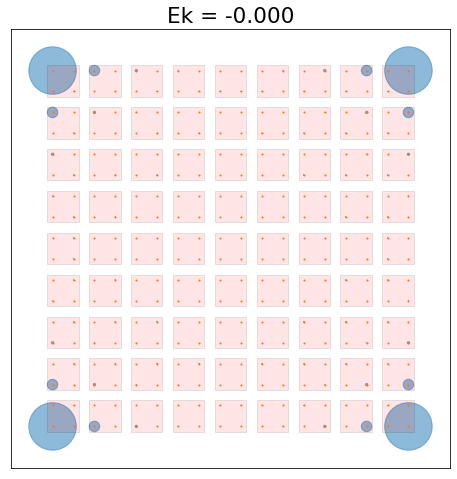

In [19]:
fig, ax = plt.subplots(1)
ax.scatter(x,y,s=S*10000,alpha=0.5)
ax.scatter(x,y, s = 1)
boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
    boxes.append(rect)

pc = PatchCollection(boxes, facecolor='r', alpha=0.1,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
ax.set_title("Ek = {0:.3f}".format(ek))
ax.set_xlim(-2,19)
ax.set_ylim(-2,19)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.savefig('state_square.pdf')
plt.show()

In [20]:
indexsort = argsort(Ek)

In [21]:
from ipywidgets import *


In [22]:
Ei = np.unique(np.round(Ek,3))
@interact(n=(0,len(Ei) - 1))
def enpsi(n=0):
    Est = [i for i,val in enumerate(np.round(Ek,3)) if val == Ei[n]]
    Esel = Ei[n]
    s = [np.real(U.T[i]*U.conjugate().T[i]) for i in Est]
    S = np.zeros(len(s[0]))
    for i in range(len(s)):
        S += s[i] 
    S = S/len(s)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.0,6.0))
    axes.set_title("Ek = {0:.3f}".format(Esel))
    axes.scatter(x,y,color="red",s=3,zorder=2)
    axes.scatter(x,y,s=S*10000,alpha=0.5)
    
    fig.tight_layout()
    boxes = []
    for i in range(len(Rx)):

        rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
        boxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(boxes, facecolor='r', alpha=0.1,
                         edgecolor='black')

    # Add collection to axes
    axes.add_collection(pc)
    plt.show()

    

interactive(children=(IntSlider(value=0, description='n', max=88), Output()), _dom_classes=('widget-interact',…

In [23]:
fig, ax = plt.subplots()
ax.scatter(range(len(indexsort)),Ek[indexsort],s = 4)
ax.set_xlabel("No.eigenvalue")
ax.set_ylabel("$E_k$")
ax.grid()

## Numero de Chern

flujo de barry 
$$F_{nm} = -Im(log\,( \langle \psi_{n,m} | \psi_{n +1,m} \rangle \,\langle \psi_{n+1,m} | \psi_{n +1,m + 1} \rangle \,\langle \psi_{n+1,m+1} | \psi_{n ,m+1} \rangle\, \langle \psi_{n,m+1} | \psi_{n,m} \rangle))$$

In [24]:
##funcion para encontrar los estados que posteriormente se braketearan 
#(jajaja) en el flujo de barry

Chern = []
for ek in range(0,len(Ek)):#,len(Ek)):
    Fbarry = []
    for i in range(0,18):
        for j in range(0,18):
                ax  = np.where(x == i)
                bx  = np.where(x == i+1)
                a   = np.hstack((ax,bx))
                ny  = y[a][0]
                ay  = np.where(ny == j)
                by  = np.where(ny == j+1)
                b   = np.hstack((ay,by))[0]
                #print(b,i,j)
                ϕ   = U.T[ek][b]
                if len(b) == 4:
                    fb = -(log(ϕ[0]*ϕ[2].conjugate()*ϕ[2]*ϕ[3].conjugate()*ϕ[3]*ϕ[1].conjugate()*ϕ[1]*ϕ[0].conjugate()).imag)
                    Fbarry.append(fb)
                    
    Q = sum(Fbarry)/(2*pi)
    Chern.append(Q)            

    


<ipython-input-24-d9852d5589b0>:19: RuntimeWarning: divide by zero encountered in log
  fb = -(log(ϕ[0]*ϕ[2].conjugate()*ϕ[2]*ϕ[3].conjugate()*ϕ[3]*ϕ[1].conjugate()*ϕ[1]*ϕ[0].conjugate()).imag)


## Wilson loops k-space

In [25]:
γ = 1
λ = 4.5
def SSH(kx,ky,λ,γ):    
    H = np.array([[0, γ + λ*exp(-1j*kx), 0 , -γ + λ*exp(-1j*ky)]
                  ,[γ + λ*exp(1j*kx), 0 , γ - λ*exp(-1j*ky), 0]
                  ,[0, γ - λ*exp(1j*ky), 0 , γ + λ*exp(1j*kx)]
                  ,[-γ + λ*exp(1j*ky), 0 , γ + λ*exp(-1j*kx), 0]])
    return matrix(H)

In [26]:
class wannier_bands:
    def plot_bands(nx,ny):
        figsize(6,4)
        for ky in linspace(-pi,pi,ny):#para cada ky
            WL=eye(4) #se genera una matriz identidad de 4x4
            for kx in linspace(-pi,pi,nx):#[1:-1]: #para cada kx:
                H=SSH(kx,ky,λ,γ) #se calcula la matriz correspondiente SSH
                eigdat=eigh(H); #se calculan sus eigencosas
                eigdat[0]<0 #Se verifican las eigen energias negativas
                P=eigdat[1][:,eigdat[0]<0]*eigdat[1][:,eigdat[0]<0].H #se toman solo las columnas de E positivas
                #y se multiplica esta matriz de 2x4 por su transpuesta conjugada
                WL=P*WL #se multiplica la diagonal de esta matriz
            #H1 = SSH(-pi,ky,λ,γ); eigdat1 = eigh(H1) ; P1 = eigdat1[1][:,eigdat[0]<0].H
            #Hn = SSH(pi,ky,λ,γ);  eigdatn = eigh(Hn) ; Pn = eigdatn[1][:,eigdat[0]<0]
            #WL = P1*WL*Pn
            weig=eig(WL); #se le sacan nuevamente las eigenvalores a esta matrix
            indx=where(abs(weig[0])>10**-10)[0] # se verifican los eigenvalores de norma positiva
            plot(ky*ones(len(indx)),angle(weig[0][indx]),'ko',ms=1) #se grafica k vs el angulo que forma
        plot([-pi,pi],[1/2,1/2],'b-'); plot([-pi,pi],[1/2,1/2],'b-')
        ylim(-pi,pi) ; xlim(-pi,pi) ; xlabel(r'$k_y$') ; ylabel(r'Wilson loop phases $\theta$ ');
        
    def con_bands(nx,ny):
        figsize(6,4)
        Min = []
        for ky in linspace(-pi,pi,ny):#para cada ky
            WL=eye(4) #se genera una matriz identidad de 4x4
            for kx in linspace(-pi,pi,nx):#[1:-1]: #para cada kx:
                H=SSH(kx,ky,λ,γ) #se calcula la matriz correspondiente SSH
                eigdat=eigh(H); #se calculan sus eigencosas
                eigdat[0]<0 #Se verifican las eigen energias negativas
                P=eigdat[1][:,eigdat[0]<0]*eigdat[1][:,eigdat[0]<0].H #se toman solo las columnas de E positivas
                #y se multiplica esta matriz de 2x4 por su transpuesta conjugada
                WL=P*WL #se multiplica la diagonal de esta matriz
            #H1 = SSH(-pi,ky,λ,γ); eigdat1 = eigh(H1) ; P1 = eigdat1[1][:,eigdat[0]<0].H
            #Hn = SSH(pi,ky,λ,γ);  eigdatn = eigh(Hn) ; Pn = eigdatn[1][:,eigdat[0]<0]
            #WL = P1*WL*Pn
            weig=eig(WL); #se le sacan nuevamente las eigenvalores a esta matrix
            indx=where(abs(weig[0])>10**-10)[0] # se verifican los eigenvalores de norma positiva
            Min.append(min(abs(angle(weig[0][indx]))))
        return min(Min)
    def polarization(nx,ny):
        figsize(6,4)
        for ky in linspace(-pi,pi,ny):#para cada ky
            WL=eye(4) #se genera una matriz identidad de 4x4
            for kx in linspace(-pi,pi,nx):#[1:-1]: #para cada kx:
                H=SSH(kx,ky,λ,γ) #se calcula la matriz correspondiente SSH
                eigdat=eigh(H); #se calculan sus eigencosas
                eigdat[0]<0 #Se verifican las eigen energias negativas
                P=eigdat[1][:,eigdat[0]<0]*eigdat[1][:,eigdat[0]<0].H #se toman solo las columnas de E positivas
                #y se multiplica esta matriz de 2x4 por su transpuesta conjugada
                WL=P*WL #se multiplica la diagonal de esta matriz
                print(det(WL))
            if det(WL) > 10**-10:
                plot(ky,angle(det(WL)),'ko',ms=1) #se grafica k vs el angulo que forma
        plot([-pi,pi],[1/2,1/2],'b-'); plot([-pi,pi],[1/2,1/2],'b-')
        ylim(-pi,pi) ; xlim(-pi,pi) ; xlabel(r'$k_y$') ; ylabel(r'Wilson loop phases $\theta$ ');
        

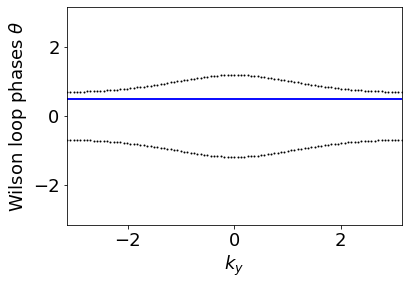

In [27]:
wannier_bands.plot_bands(301,101)

Text(0.5, 1.0, 'Converge:0.70')

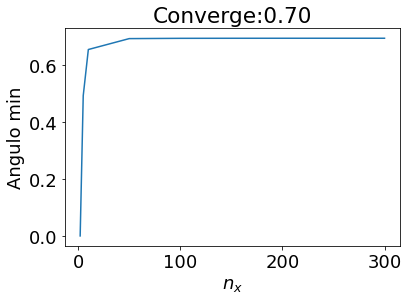

In [28]:
Min = []
Nx  = [2,5,10,50,100,150,200,300]
for nx in Nx:
    Min.append(wannier_bands.con_bands(nx,100))
plot(Nx,Min)
xlabel(r'$n_x$')
ylabel(r'Angulo min')
title(r'Converge:{0:.2f}'.format(Min[-1]))

(-6.49933168859815e-34+1.086736651905708e-49j)
(-1.5994198311034082e-50+1.1525034488586067e-34j)
(-5.84307829084145e-34+1.0955771795327717e-34j)
(1.396534540869701e-34+1.396534540869701e-34j)
(1.0048881151897883e-34+5.578249613279396e-51j)
(8.385060621715931e-34-1.447780251231526e-34j)
(-3.0867033923219065e-34+6.173406784643809e-34j)
(-5.901940984160871e-34+3.5411645904965228e-34j)
(-4.348077825094216e-34-7.714331625167179e-35j)
(1.0612015170383243e-34-1.0612015170383237e-34j)
(-1.1168132879308169e-33-5.3221901377694235e-34j)
(-1.3677496568813346e-33-8.778431796982826e-34j)
(-6.495489998690812e-34+1.6745489747618332e-34j)
(-8.62607212914945e-34-1.5193712549075661e-34j)
(-1.2753359106030792e-33+1.306314440048593e-34j)
(-9.168938839399814e-34+8.31846193658356e-34j)
(4.2536555140983015e-34-8.753939617876084e-34j)
(-2.681108627931985e-34+3.0657513203341657e-34j)
(-9.706669658325653e-35-1.262565079771774e-34j)
(7.419098300228643e-34-6.388010343719578e-34j)
(1.8832277904272985e-34-5.27795054

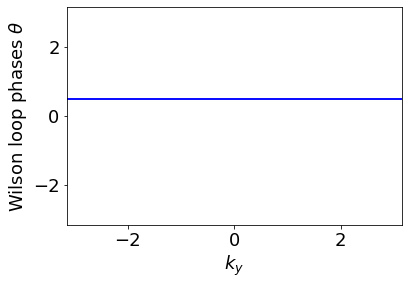

In [29]:
wannier_bands.polarization(10,10)